In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
from importlib import reload
import scipy.interpolate as scint
import ternary

from datetime import datetime

import better_mob as bm
import pandas as pd

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from importlib import reload
reload(bm)

<module 'better_mob' from '/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py'>

In [3]:
plt.rc('font', family='STIXGeneral')
r=(216,27,96)
r='#D81B60'
r='#ff6600' #changed to the new orange
r='#be0f34'
b=(30,136,229)
b='#1E88E5'
b='#1E88E5'
ob='#002147'
g=(0,77,64)
g='#004D40'
g='#007770'
y=(255,193,7)
y='#FFC107'
y='#f5cf47'

# top = np.array([np.array([255,193,7, 256])/256]*128)
# top = np.array([np.array([150,150,150,256])/256]*128)
# bottom = np.array([np.array([256,256,256,0])/256]*128)
# newcolors = np.vstack((top, bottom))
# newcolors = np.vstack((bottom, top))
# newcmp = ListedColormap(newcolors)
# plt.matshow(np.random.rand(25, 25), cmap=newcmp)

In [4]:
enz_star=0.15
del_mu=8.0
del_e=-5.0
k_spo=1.0
k_cat=1
Dpe=4.0
Dse=1.0
v_rat=20.0

phie0=0.15

#Additional Parameters for ternary
Dps=10
v_s = 1
v_w = v_s
Dew=10
Dsw=10
Dpw=10

In [5]:
k_cat_tanfile = './20210907180535_tangent.csv'
df = pd.read_csv(k_cat_tanfile)
df['phi1mid'] = ((df['phiE1hi']+df['phiE1low'])/2)
df['phi2mid'] = (df['phiE2hi']+df['phiE2low'])/2
df = df[df['phiE1hi'] != 1]

vol1 = df[['k_cat','phi1mid']].copy().rename(columns={'k_cat': 'k_cat', 'phi1mid': 'binod'})
vol2 = df[['k_cat','phi2mid']].copy().rename(columns={'k_cat': 'k_cat', 'phi2mid': 'binod'})
k_cat_ordered = pd.concat([vol1, vol2]).sort_values('binod')

cks = scint.CubicSpline(k_cat_ordered['binod'], k_cat_ordered['k_cat'])

del_mu_tanfile = './20211122183752_tangent.csv'
df = pd.read_csv(del_mu_tanfile)
df['phi1mid'] = ((df['phiE1hi']+df['phiE1low'])/2)
df['phi2mid'] = (df['phiE2hi']+df['phiE2low'])/2
df = df[df['phiE1hi'] != 1]

vol1 = df[['del_mu','phi1mid']].copy().rename(columns={'del_mu': 'del_mu', 'phi1mid': 'binod'})
vol2 = df[['del_mu','phi2mid']].copy().rename(columns={'del_mu': 'del_mu', 'phi2mid': 'binod'})
del_mu_ordered = pd.concat([vol1, vol2]).sort_values('binod')

cmus = scint.CubicSpline(del_mu_ordered['binod'], del_mu_ordered['del_mu'])

k_cats, enzs_k = np.meshgrid(np.arange(0.1, 1.9, .02), np.arange(0.0001, 0.4, 0.01))
del_mus, enzs_mu = np.meshgrid(np.arange(2, 10, .05), np.arange(0.0001, 0.4, 0.01))
enzx = np.arange(np.min(k_cat_ordered['binod']), np.max(k_cat_ordered['binod']), 0.001)

In [6]:
sys = [enz_star, del_mu, del_e, k_spo, k_cat, Dpe, Dse, v_rat]
sys_label = ['enz_star', 'del_mu', 'del_e', 'k_spo', 'k_cat', 'Dpe', 'Dse', 'v_rat']
title = ''
for lab, val in zip(sys_label, sys):
    if np.size(val) == 1:
        title += '{}: '.format(bm.labels[lab])
        title += '{0:.3g}, '.format(val)
title = title[:-2]

In [7]:
#making some activity plots
enz_star=0.15
del_mu=8.0
del_e=-5.0
k_spo=1.0
k_cat=1
Dpe=4.0
Dse=1.0
v_rat=20.0

phie0=0.15

#Additional Parameters for ternary
Dps=10
v_s = 1
v_w = v_s
Dew=10
Dsw=10
Dpw=10

enzs = np.arange(00.0001, 1-0.0001, 0.0001)

#can use this if k_cat of choice was sampled in tangents

crit_ind = np.argmin(del_mu_ordered['del_mu'])+1

del_mu_ordered_low = del_mu_ordered.iloc[0:crit_ind]
del_mu_ordered_hi = del_mu_ordered.iloc[crit_ind:]

loE = del_mu_ordered_low.iloc[np.argmin(np.abs(del_mu_ordered_low['del_mu'] - del_mu))]['binod']
hiE = del_mu_ordered_hi.iloc[np.argmin(np.abs(del_mu_ordered_hi['del_mu'] - del_mu))]['binod']

act_hiE = hiE*bm.Re(del_mu, del_e, hiE, 1-hiE, k_spo, k_cat)
act_loE = loE*bm.Re(del_mu, del_e, loE, 1-loE, k_spo, k_cat)

instabs = bm.inst_cond(del_mu,del_e,enzs,k_spo,k_cat,Dpe,Dse,v_rat)
instabs_phi_plt = bm.inst_cond(del_mu,del_e,enzs,k_spo,k_cat,Dpe,Dse,v_rat)
one_phase_conv = instabs > 0
two_phase_conv = instabs < 0
one_phase_act_conv = enzs*bm.Re(del_mu, del_e, enzs, 1-enzs, k_spo, k_cat)
two_phase_act_conv = act_hiE*(enzs-loE)/(hiE-loE) + act_loE*(hiE-enzs)/(hiE-loE)

activity_conv = one_phase_act_conv*one_phase_conv + two_phase_act_conv*two_phase_conv

In [9]:
minx, maxx = np.min(del_mu_ordered['binod']), np.max(del_mu_ordered['binod'])
del_mus = np.arange(2, 10, .005)
activities = {}
one_phases = {}
two_phases = {}
bino_splits = {}
has_split = {}

cmus = scint.CubicSpline(del_mu_ordered['binod'], del_mu_ordered['del_mu'])
back_cmus_l = scint.CubicSpline(del_mu_ordered_low['del_mu'][::-1], del_mu_ordered_low['binod'][::-1])
back_cmus_h = scint.CubicSpline(del_mu_ordered_hi['del_mu'], del_mu_ordered_hi['binod'])


# for enz_star in [0.02, critical, 0.15, 0.3]:
a1, a2 = 0.065, 0.15
for enz_star in [a1, a2]:
    print(enz_star)
#     if enz_star >= np.max(xs):
#         one_phase_act = enz_star*bm.Re(del_mu, del_e, enz_star, 1-enz_star, k_spo, k_cats)
#         activities[enz_star] = one_phase_act
#         one_phases[enz_star] = one_phase_act
#     else:
    instabs = bm.inst_cond(del_mus, del_e, enz_star, k_spo, k_cat, Dpe, Dse, v_rat)
    one_phase = instabs > 0
    two_phase = instabs < 0

    #Find the binodal and get the phases at each point
    hiEs = back_cmus_h(del_mus)
    lowEs = back_cmus_l(del_mus)

    #Get the acitvities
    one_phase_act = enz_star*bm.Re(del_mus, del_e, enz_star, 1-enz_star, k_spo, k_cat)
    hi_act = hiEs*bm.Re(del_mus, del_e, hiEs, 1-hiEs, k_spo, k_cat)
    low_act = lowEs*bm.Re(del_mus, del_e, lowEs, 1-lowEs, k_spo, k_cat)
    two_phase_act = hi_act*(enz_star-lowEs)/(hiEs-lowEs) + low_act*(hiEs-enz_star)/(hiEs-lowEs)
    activities[enz_star] = one_phase*one_phase_act + two_phase*two_phase_act
    one_phases[enz_star] = one_phase_act
    two_phases[enz_star] = two_phase_act

    # See if above bino and get the above bino activity
    #need to get this to work if never crosses spino or bino
    above_bino = del_mus > cmus(enz_star)
    below_bino = del_mus <= cmus(enz_star)
    bino_split = below_bino*one_phase_act + above_bino*two_phase_act
    bino_splits[enz_star] = bino_split
    has_split[enz_star] = two_phase

0.065
0.15


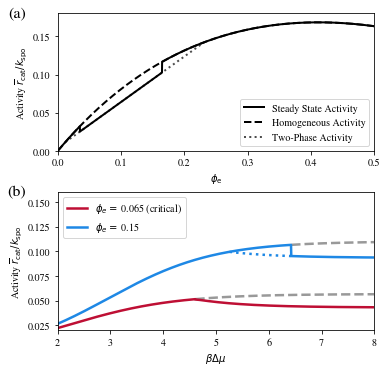

In [10]:
lt = 2

fig2, (f2_ax1, f2_ax2) = plt.subplots(2, 1, figsize=(5.5,5.5))
f2_ax1.plot(enzs, activity_conv, c='k', label='Steady State Activity', lw=lt)
f2_ax1.plot(enzs, one_phase_act_conv, c='k', ls='--', label='Homogeneous Activity', lw=lt)
f2_ax1.set(xlim=[0, 0.5], ylim=[0, 0.18], xlabel='$\phi_\mathrm{e}$', ylabel='Activity $\overline{r}_\mathrm{cat}/k_\mathrm{spo}$')

between = (enzs < hiE)*(enzs > loE)
f2_ax1.plot(enzs[between], two_phase_act_conv[between], c='k', ls=':', alpha=0.7, label='Two-Phase Activity', lw=lt)
# f2_ax1.plot(enzs[between], two_phase_act_conv[between], c='k', alpha=0.4, label='Two Phase Activity')
# linestyle=(0, (3, 1, 1, 1, 1, 1))

# f2_ax1.scatter(hi_end,hi_end*bm.Re(del_mu, del_e, hi_end, 1-hi_end, k_spo, k_cat), marker='^', s=marksize, alpha=palp, c=pcol)
# f2_ax1.scatter(enz_star,enz_star*bm.Re(del_mu, del_e, enz_star, 1-enz_star, k_spo, k_cat), marker='o', s=marksize, alpha=palp, c=pcol)
# f2_ax1.scatter(low_end,low_end*bm.Re(del_mu, del_e, low_end, 1-low_end, k_spo, k_cat), marker='s', s=marksize, alpha=palp, c=pcol)

f2_ax1.legend(loc='lower right')

lt = 2.5

f2_ax2.plot(del_mus, activities[a1], c=r, label='$\phi_e =$ {} (critical)'.format(a1), lw=lt)
f2_ax2.plot(del_mus[has_split[a1]], np.array(one_phases[a1])[has_split[a1]], c='k', ls='--', alpha=0.4, lw=lt, zorder=0)

f2_ax2.plot(del_mus, activities[a2], c=b, label='$\phi_e = $ {}'.format(a2), lw=lt)
f2_ax2.plot(del_mus[has_split[a2]], np.array(one_phases[a2])[has_split[a2]], c='k', ls='--', alpha=0.4, lw=lt, zorder=0) #, label='Homogeneous Activity'

bi2spi = (del_mus > cmus(a2))*one_phase
# plt.plot(del_mus[bi2spi], two_phases[a2][bi2spi], c=b, ls=(0, (3, 1, 1, 1, 1, 1)), lw=lt) #label='Two Phase'
plt.plot(del_mus[bi2spi], two_phases[a2][bi2spi], c=b, ls=':', lw=lt) #label='Two Phase'

# f2_ax2.scatter(1,enz_star*bm.Re(del_mu, del_e, enz_star, 1-enz_star, k_spo, k_cat), marker='o', s=marksize, alpha=palp, c=pcol)

f2_ax2.set(xlim=[2, 8], ylim=[0.02, 0.16], xlabel=bm.labels['del_mu'], ylabel='Activity $\overline{r}_\mathrm{cat}/k_\mathrm{spo}$')
f2_ax2.legend(ncol=1,loc='upper left')

f2_ax1.text(-0.1, 1.05, '(a)', transform=f2_ax1.transAxes,
      fontsize=16, va='top', ha='right')
f2_ax2.text(-0.1, 1.05, '(b)', transform=f2_ax2.transAxes,
      fontsize=16, va='top', ha='right')

# f2_ax1.xaxis.label._y = 250

plt.subplots_adjust(left=0.15,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

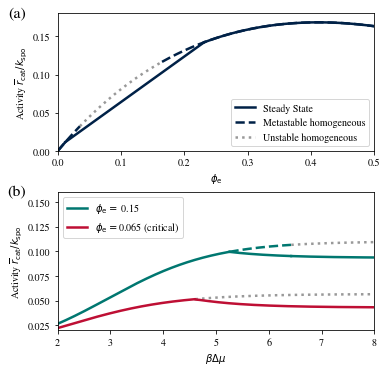

In [17]:
lt = 2.5
bi2spi = (del_mus > cmus(a2))*one_phase
between = (enzs < hiE)*(enzs > loE)
e_upper = (enzs > hiE)
e_lower = (enzs < loE)

meta_upper = (instabs_phi_plt > 0)*(enzs>0.1)
meta_lower = (instabs_phi_plt > 0)*(enzs<0.1)

fig2, (f2_ax1, f2_ax2) = plt.subplots(2, 1, figsize=(5.5,5.5))
f2_ax1.plot(enzs[between], two_phase_act_conv[between], c=ob, label='Steady State', lw=lt)
f2_ax1.plot(enzs[e_upper], one_phase_act_conv[e_upper], c=ob, lw=lt)
f2_ax1.plot(enzs[e_lower], one_phase_act_conv[e_lower], c=ob, lw=lt)
f2_ax1.plot(enzs[meta_upper], one_phase_act_conv[meta_upper], c=ob, lw=lt, ls='--', label='Metastable homogeneous')
f2_ax1.plot(enzs[meta_lower], one_phase_act_conv[meta_lower], c=ob, lw=lt, ls='--')
f2_ax1.plot(enzs[instabs_phi_plt < 0], one_phase_act_conv[instabs_phi_plt < 0], c='k',alpha=0.4, ls=':', label='Unstable homogeneous', lw=lt)

f2_ax1.set(xlim=[0, 0.5], ylim=[0, 0.18], xlabel='$\phi_\mathrm{e}$', ylabel='Activity $\overline{r}_\mathrm{cat}/k_\mathrm{spo}$')
f2_ax1.legend(loc='lower right')

lt = 2.5

post_split = (del_mus > cmus(a2))
pre_split = (del_mus < cmus(a2))
post_spino = post_split*np.invert(bi2spi)

one_phases[a2][pre_split]
f2_ax2.plot(del_mus[pre_split],activities[a2][pre_split], c=g, label=r'$\phi_\mathrm{e} = $ 0.15', lw=lt)
f2_ax2.plot(del_mus[post_spino], np.array(one_phases[a2])[post_spino], c='k', ls=':', alpha=0.4, lw=lt, zorder=0) #, label='Homogeneous Activity'
f2_ax2.plot(del_mus[post_spino], np.array(two_phases[a2])[post_spino], c=g, lw=lt, zorder=0)
f2_ax2.plot(del_mus[bi2spi], np.array(two_phases[a2])[bi2spi], c=g, lw=lt, zorder=0)
f2_ax2.plot(del_mus[bi2spi], np.array(one_phases[a2])[bi2spi], c=g, ls='--', lw=lt, zorder=0)

f2_ax2.plot(del_mus, activities[a1], c=r, label='$\phi_\mathrm{e} = $0.065 (critical)', lw=lt)
f2_ax2.plot(del_mus[has_split[a1]], np.array(one_phases[a1])[has_split[a1]], c='k', ls=':', alpha=0.4, lw=lt, zorder=0)

f2_ax2.set(xlim=[2, 8], ylim=[0.02, 0.16], xlabel=bm.labels['del_mu'], ylabel='Activity $\overline{r}_\mathrm{cat}/k_\mathrm{spo}$')
f2_ax2.legend(ncol=1,loc='upper left')

f2_ax1.text(-0.1, 1.05, '(a)', transform=f2_ax1.transAxes,
      fontsize=16, va='top', ha='right')
f2_ax2.text(-0.1, 1.05, '(b)', transform=f2_ax2.transAxes,
      fontsize=16, va='top', ha='right')

plt.subplots_adjust(left=0.15,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

In [19]:
fig2.savefig('../../figures/CIPSautoregulation.pdf')